<a href="https://colab.research.google.com/github/Rakesh00966/Fish-Weight-Prediction/blob/main/Fish_weight_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [101]:
df = pd.read_csv('/content/Fish[1].csv')
df.head(2)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.52,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.48,4.3056


# Understanding the Dataset
 The Datset describing about the physical charecterestics of each fish from different species. There are 7 features in the dataset. Lets go through each column:

* Species: It describes about the type of fish (Bream, Roach, Whitefish, Parkki, Perch, Pike, Smelt).
* Weight : The weight of the fish in grams
* Length1,Length2,Length3 are the measures of fish like vertical from head to tail and horizontal and diagonal lengths
* Height is the height of the fish.
* width is the thickness of the fish
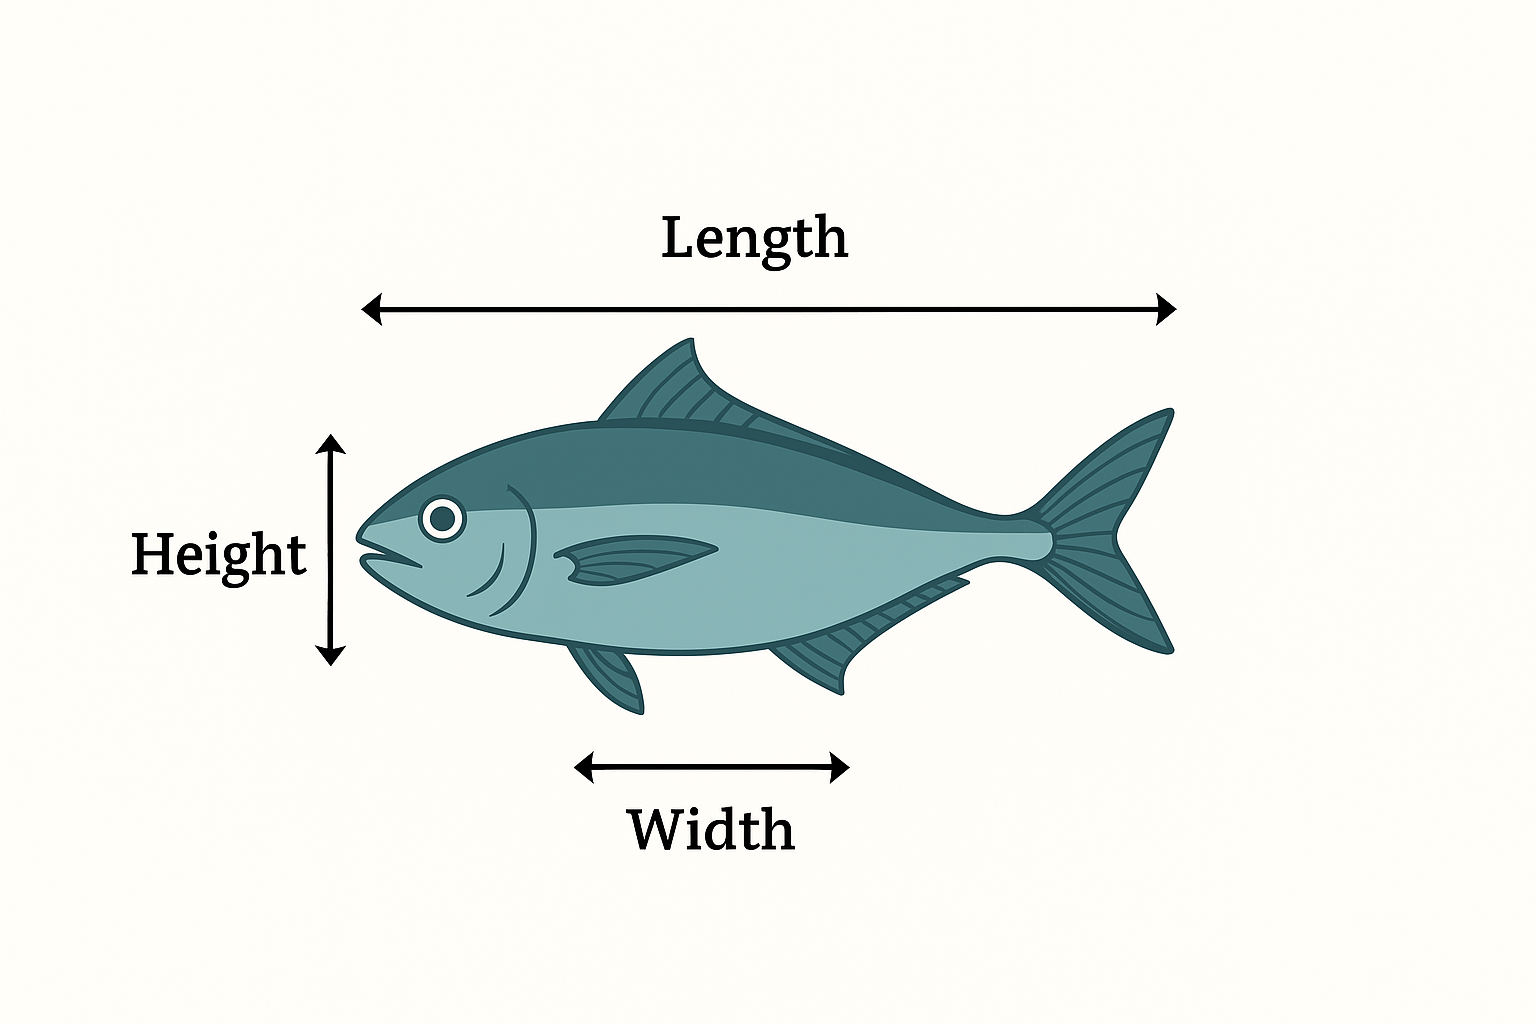



In [102]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


* Since the difference between mean and median in weight coulumn is high there might be presence of outliers in dataset. Because 75% of data is under 650gm only. So there is a chance have outliers in this column.
* And the remaining columns almost having similar values of mean and median

In [103]:
df.isnull().mean()

,0
Species,0.0
Weight,0.0
Length1,0.0
Length2,0.0
Length3,0.0
Height,0.0
Width,0.0


* There were no null values in the dataset

In [104]:
df[["Weight",	"Length1",	"Length2",	"Length3",	"Height"	,"Width"]].corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


* Almost every column having the relation with its corresponding columns
* There is very strong relation between length1 and length2.
* Also the lengths of the fish having strong relationships with each other. So there might be a chance of removing 1 or 2 out of these get high accuracy in model testing. Lets process it in our further steps.

# Univariate analysis



In [105]:
def plot_hist(column,xlabel,title,bins,rotation = 0):
  plt.figure(figsize = (15,5))
  sns.histplot(column,bins = bins,kde = True)
  plt.xlabel(xlabel,fontsize = 12)
  plt.title(title,fontsize =15)
  plt.ylabel("frequency",fontsize=12)
  plt.xticks(rotation = rotation)
  plt.show()

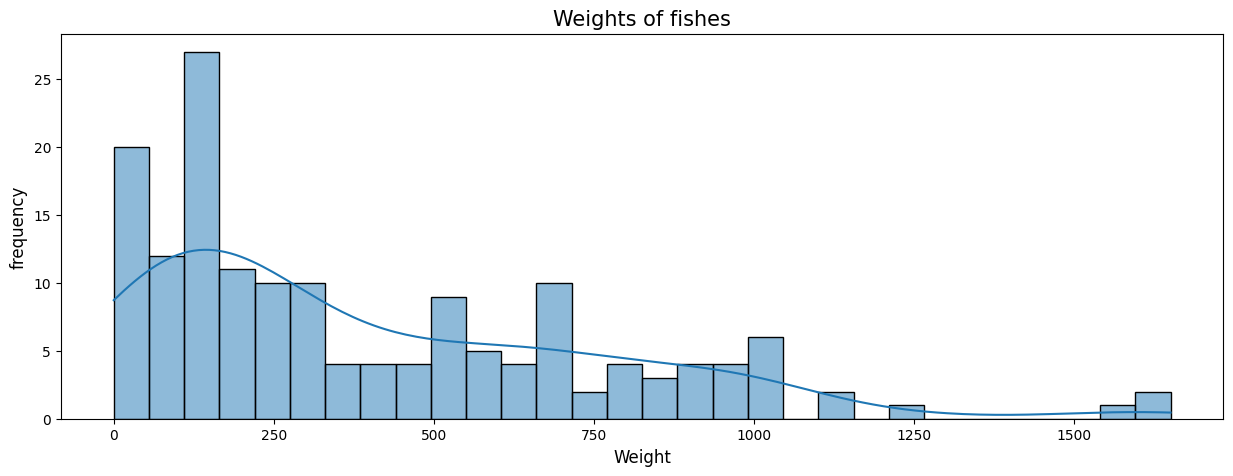

Skewness is : 1.1044503929261893


In [106]:
plot_hist(column=df['Weight'],xlabel = "Weight",title = "Weights of fishes",bins = 30)
print("Skewness is :",df['Weight'].skew())

* Most of the fishes weight lies between 10 to 200gms
* However there are other fishes whose weights are extremely higher than other fishes
* So there are presence of outliers in this column



* The distribution is right skewed in nature

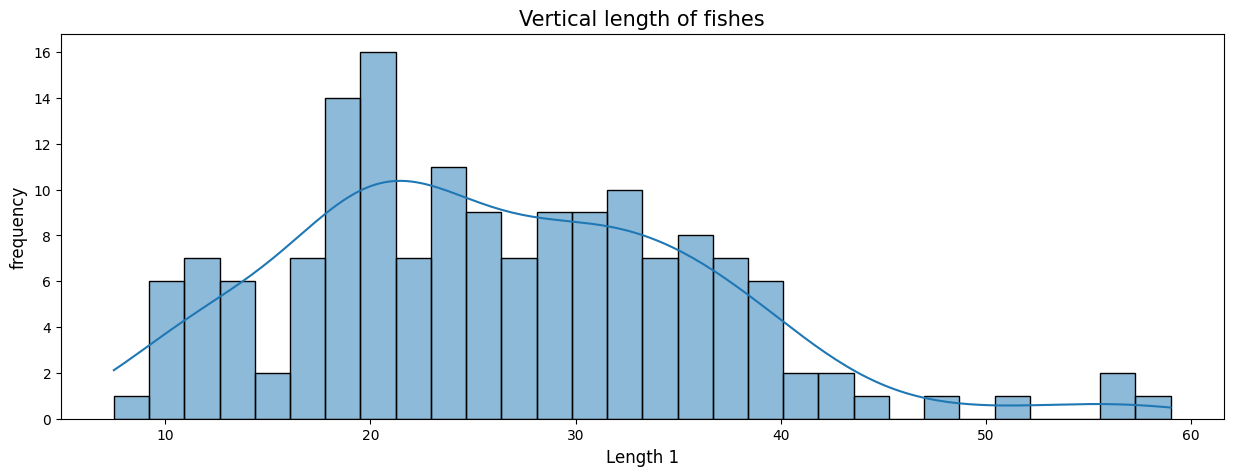

Skewness is : 0.5884823308370954


In [107]:
plot_hist(column=df["Length1"],xlabel = "Length 1",title = "Vertical length of fishes",bins = 30)
print("Skewness is :",df["Length1"].skew())

* The plot clearly showing that there are two peak distributions in this column at around 20cm of fish length.
* However there are also large number of fishes in the range of 10 to 40 cm .
* And some other fishes with high length.
* The distribution is normal.

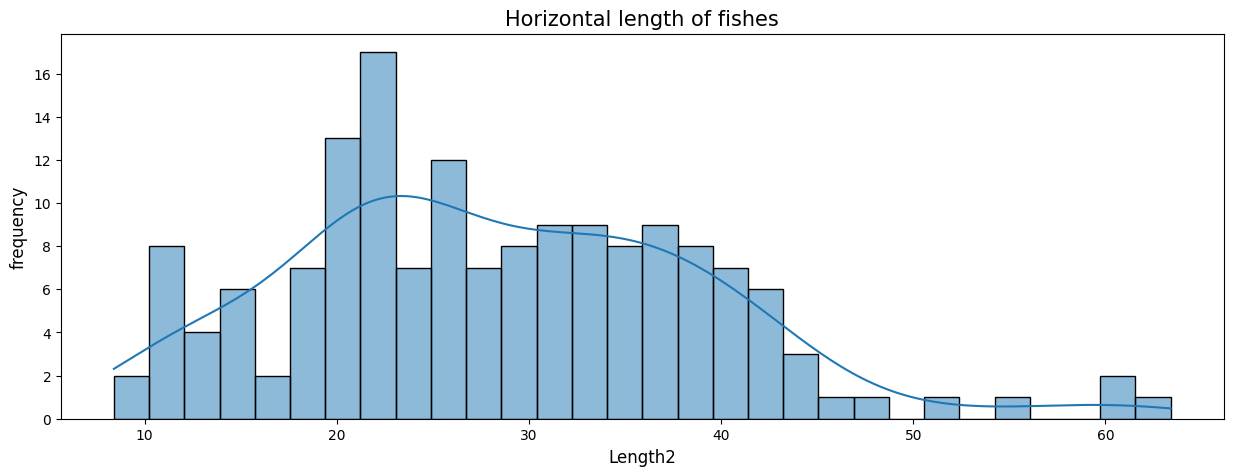

Skewness is : 0.5398630565804722


In [108]:
plot_hist(column=df["Length2"],xlabel = "Length2",title = "Horizontal length of fishes",bins = 30)
print("Skewness is :",df["Length2"].skew())

* This plot also similar to the previous one stating that the graph is slightly right skewed but not mostly.

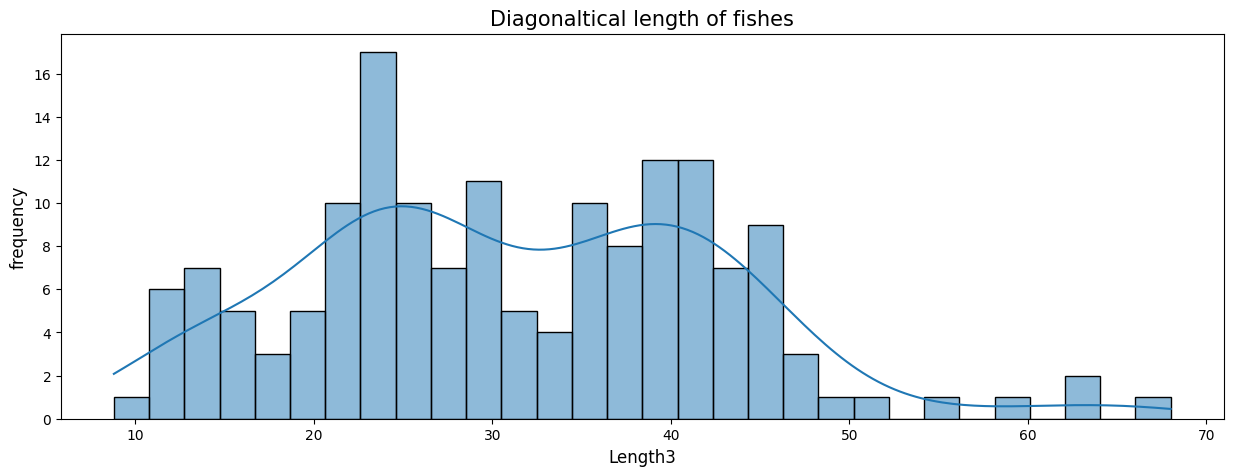

Skewness is : 0.39154084789678356


In [109]:
plot_hist(column=df["Length3"],xlabel = "Length3",title = "Diagonaltical length of fishes",bins = 30)
print("Skewness is :",df["Length3"].skew())

The skewness for this graph is slightly less then the previous ones.
* It means the diagonal length in cm of this fishes is very less moderetely right skewed

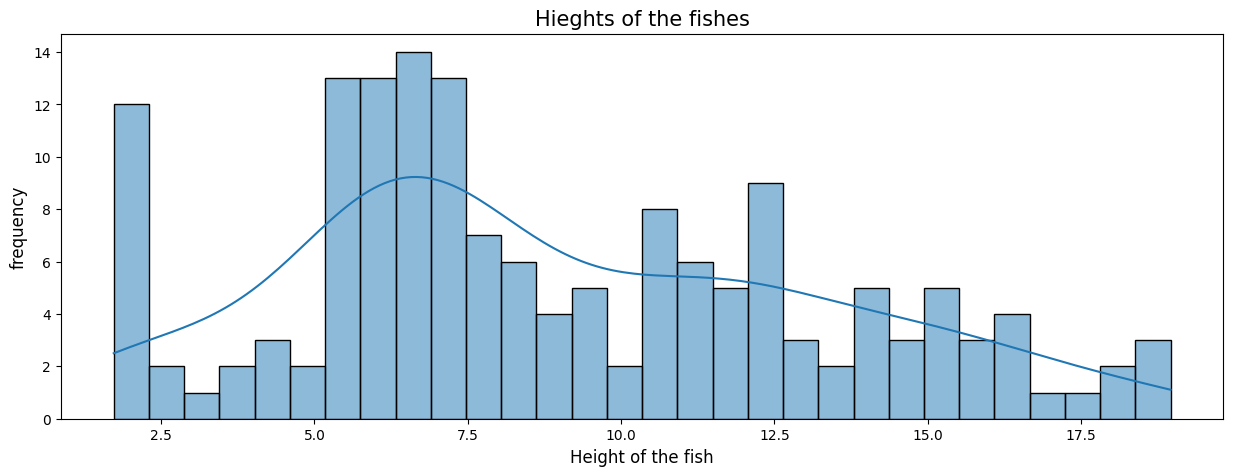

Skewness is : 0.39718636256683026


In [110]:
plot_hist(column=df["Height"],xlabel = "Height of the fish",title = "Hieghts of the fishes",bins = 30)
print("Skewness is :",df["Height"].skew())

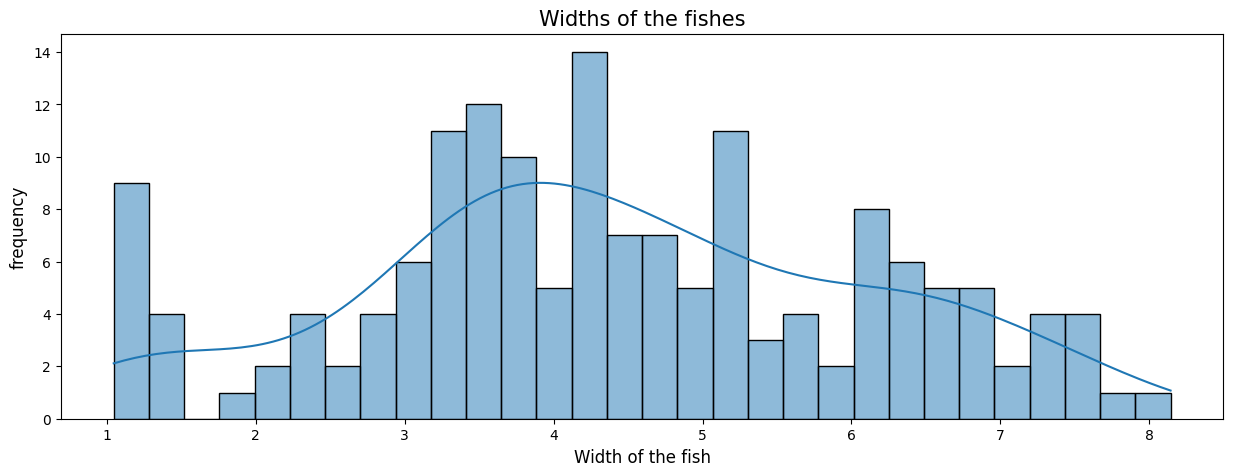

Skewness is : 0.00497224623809981


In [111]:
plot_hist(column=df["Width"],xlabel = "Width of the fish",title = "Widths of the fishes",bins = 30)
print("Skewness is :",df["Width"].skew())

This plot showing clearly that the distribution of width column is distributed normally

In [112]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


<Axes: xlabel='Species'>

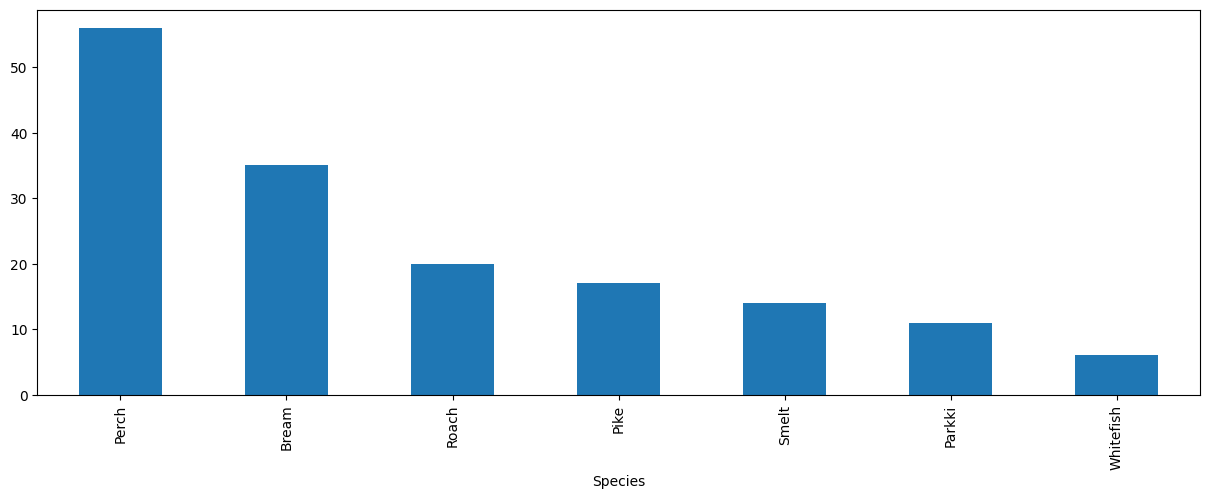

In [113]:
df1 = df['Species'].value_counts()
df1.plot(kind='bar',figsize =(15,5),xlabel ="Species")

The Barplot showin that the most of the fishes type are under the perch

# Bivariate analysis
* Our target column is weight column so lets try to find relationships between the other columns with this weight column

In [114]:
def plot_scatter(x,y,xlabel,ylabel,title):
  plt.figure(figsize=(15,5))
  sns.scatterplot(x=x,y=y)
  plt.xlabel(xlabel,fontsize = 12)
  plt.ylabel(ylabel,fontsize = 12)
  plt.title(title,fontsize = 15)
  plt.show()

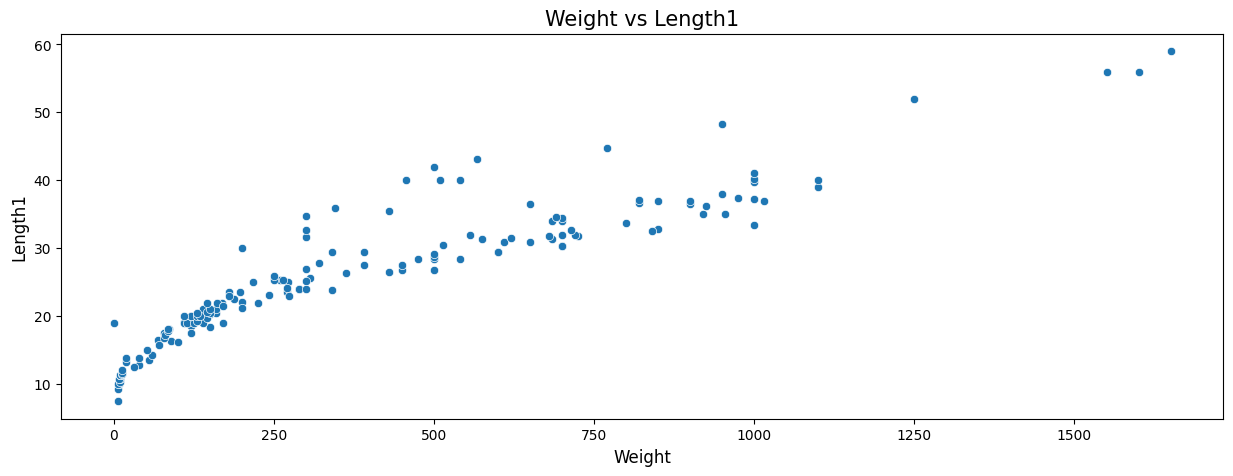

,Length1,Weight
Length1,1.000000,0.915712
Weight,0.915712,1.000000


In [115]:
plot_scatter(x=df['Weight'],y=df['Length1'],xlabel = "Weight",ylabel = "Length1",title = "Weight vs Length1")
df[["Length1","Weight"]].corr()

The scatterplot showing that there is strong relationship between length1 and weight

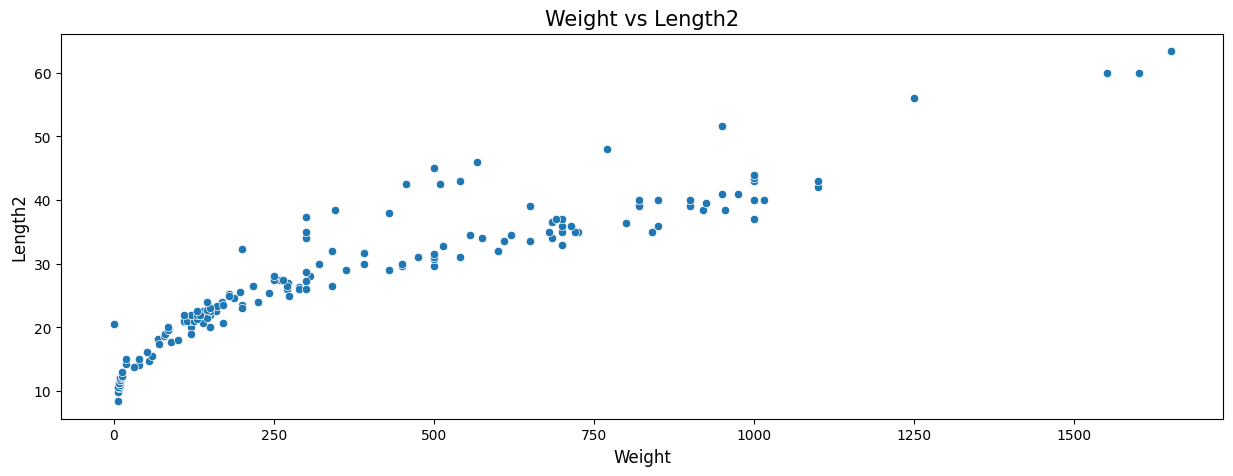

,Length2,Weight
Length2,1.000000,0.918618
Weight,0.918618,1.000000


In [116]:
plot_scatter(x=df['Weight'],y=df['Length2'],xlabel = "Weight",ylabel = "Length2",title = "Weight vs Length2")
df[["Length2","Weight"]].corr()

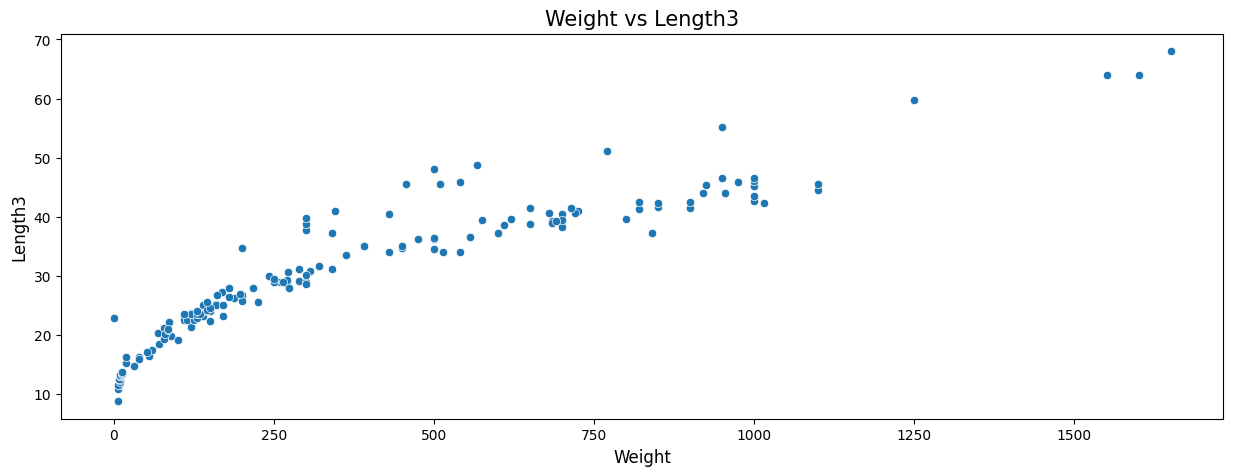

,Length3,Weight
Length3,1.000000,0.923044
Weight,0.923044,1.000000


In [117]:
plot_scatter(x=df['Weight'],y=df['Length3'],xlabel = "Weight",ylabel = "Length3",title = "Weight vs Length3")
df[["Length3","Weight"]].corr()

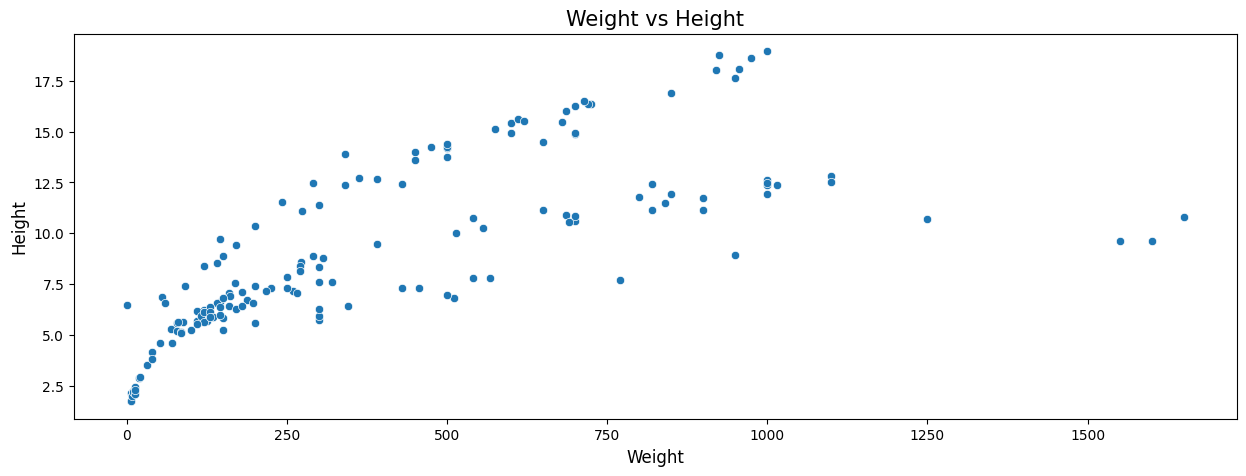

,Height,Weight
Height,1.000000,0.724345
Weight,0.724345,1.000000


In [118]:
plot_scatter(x=df['Weight'],y=df['Height'],xlabel = "Weight",ylabel = "Height",title = "Weight vs Height")
df[["Height","Weight"]].corr()

<Axes: ylabel='Weight'>

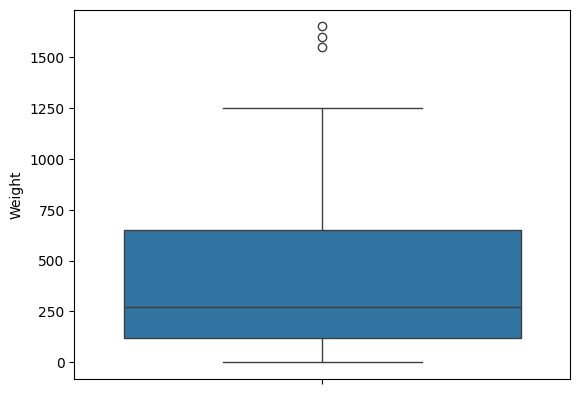

In [119]:
sns.boxplot(df['Weight'])

<Axes: xlabel='Species', ylabel='Weight'>

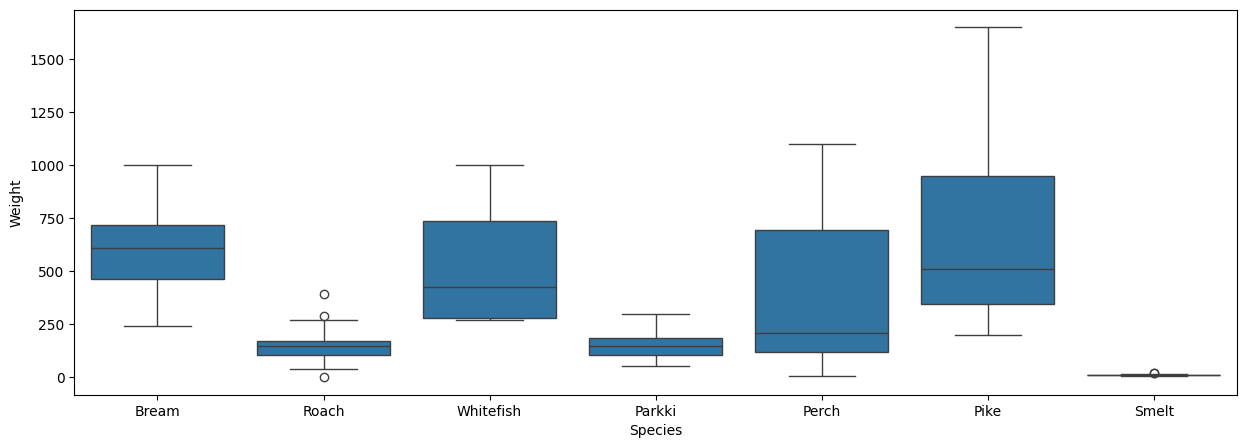

In [120]:
plt.figure(figsize=(15,5))
sns.boxplot(x= df['Species'],y = df['Weight'])

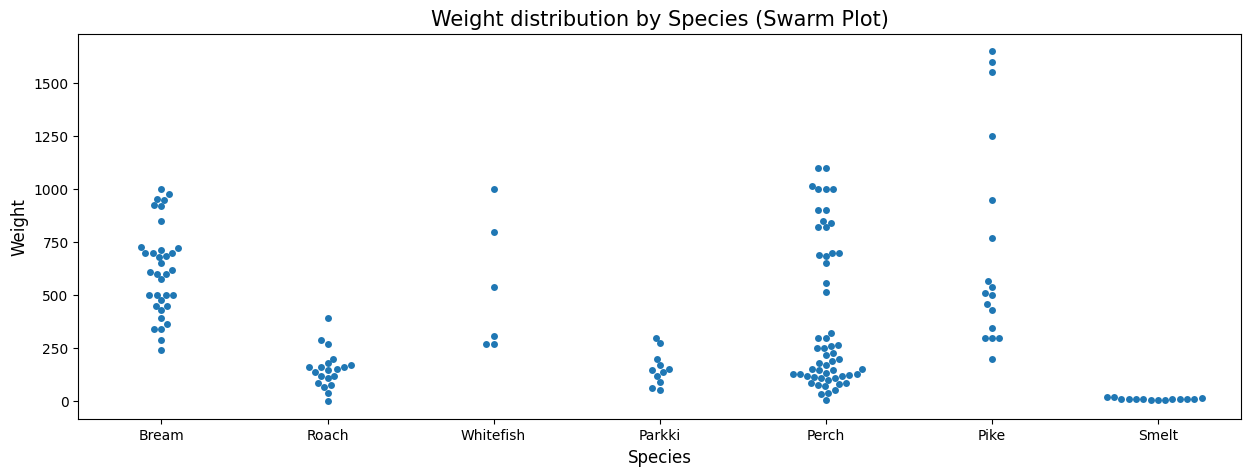

In [121]:
plt.figure(figsize=(15,5))
sns.swarmplot(x='Species', y='Weight', data=df)
plt.xlabel("Species",fontsize = 12)
plt.ylabel("Weight",fontsize = 12)
plt.title("Weight distribution by Species (Swarm Plot)",fontsize = 15)
plt.show()

# Multivariate analysis

<Axes: >

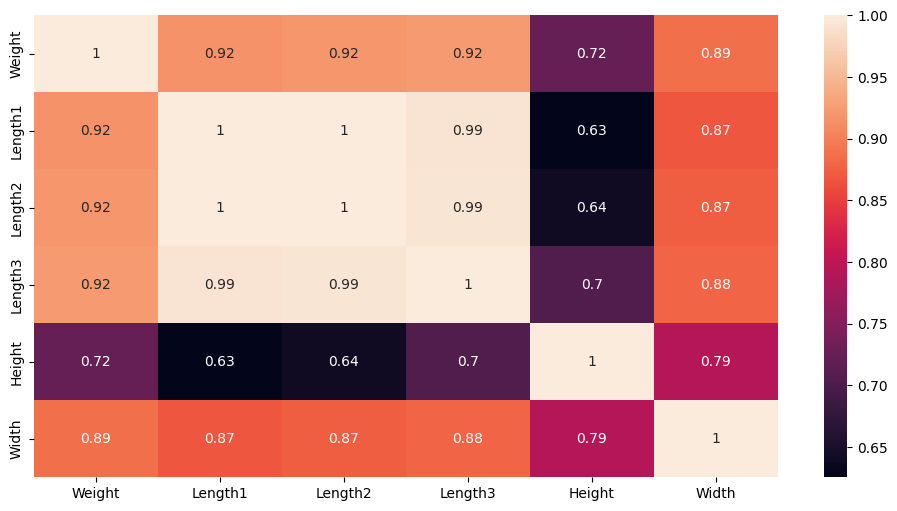

In [122]:
plt.figure(figsize=(12,6))
sns.heatmap(df.drop(['Species'], axis = 1).corr(),annot = True)

# Preparing Data

In [123]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

In [124]:
df['Species'].value_counts()

,count
Species,
2,56
0,35
4,20
3,17
5,14
1,11
6,6


In [129]:
from sklearn.model_selection import train_test_split
x = df.drop(['Weight'],axis =1)
y = df['Weight']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


# Training regression model

In [131]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

# Evaluation

In [139]:
from sklearn.metrics import r2_score,mean_squared_error
y_pred = model.predict(x_test)
print("R2 score:" , r2_score(y_test,y_pred))
mse =mean_squared_error(y_test,y_pred)
mse_r = np.sqrt(mse)
print("MSE is",mse_r)

R2 score: 0.9034878699241472
MSE is 117.16576527726234


# Removing unneccessary columns using statsmodels.api

In [140]:
import statsmodels.api as sm

xm = df.drop(['Weight'],axis =1)
ym = df['Weight']

model = sm.OLS(ym,xm).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Weight   R-squared (uncentered):                   0.895
Model:                            OLS   Adj. R-squared (uncentered):              0.891
Method:                 Least Squares   F-statistic:                              217.1
Date:                Mon, 01 Sep 2025   Prob (F-statistic):                    3.46e-72
Time:                        07:28:24   Log-Likelihood:                         -1045.3
No. Observations:                 159   AIC:                                      2103.
Df Residuals:                     153   BIC:                                      2121.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Species      -64.6924      8.347     -7.750      0.000     -81.183     -48.201
Length1      198.3515     56.446      3.514      0.001      86.838     309.865
Length2     -157.1890     60.122     -2.615      0.010    -275.965     -38.413
Length3      -12.0649     26.112     -0.462      0.645     -63.652      39.522
Height         0.7719     14.203      0.054      0.957     -27.287      28.830
Width         45.5936     31.154      1.463      0.145     -15.955     107.142
==============================================================================
Omnibus:                       40.296   Durbin-Watson:                   0.388
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.150
Skew:                           1.279   Prob(JB):                     4.32e-15
Kurtosis:                       4.856   Cond. No.                         312.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Here the P>|t| values of length3 and height columns are greater than 0.5
* so lets remove these columns and try to build the model again

In [144]:
from sklearn.model_selection import train_test_split
x = df.drop(['Weight',"Length1"],axis =1)
y = df['Weight']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
from sklearn.metrics import r2_score,mean_squared_error
y_pred = model.predict(x_test)
print("R2 score:" , r2_score(y_test,y_pred))
mse =mean_squared_error(y_test,y_pred)
mse_r = np.sqrt(mse)
print("MSE is",mse_r)

R2 score: 0.903228139407412
MSE is 117.32331582629466


So even though we are removing the Length1 column we are getting the same r2 score

# Thank you.....................